NLP_df_labeled 
ggl sheet: NLP_df_unlimit_final_more_for_upload     


In [ ]:
'''git remote add origin https://github.com/knnatt/Twitter_NLP
git add twitter-gpt.ipynb        
git commit -m "testing first repository"      
'''

In [7]:
'''! pip install pandas
! pip install keras
! pip install pythainlp
! pip install scikit-learn
! pip install numpy
! pip install matplotlib
! pip install seaborn'''


'! pip install pandas\n! pip install keras\n! pip install pythainlp\n! pip install scikit-learn\n! pip install numpy\n! pip install matplotlib\n! pip install seaborn'

In [1]:
import os
import re
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import load_model
from pythainlp.tokenize import word_tokenize
#from sklearn.metrics import confusion_matrix
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize

In [13]:
def stopwords_rm(text):
    stopwords = set(thai_stopwords())
    stopwords.update(["nan", "-", "_", "", " ", "฿" ,"ค่ะ", "ครับ", "จ้า"])  # Add more stopwords as needed

    # Remove stopwords from the text
    cleaned_text = ' '.join(word for word in text.split() if word not in stopwords)
    return cleaned_text


def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def normie(df):
    print('cleaning . . .')
    i = 0 #row number
    df['cleaned1'] = ''
    for row in df['cleaned']:
        clean = ''
        j = row.split(' ') #j is array of string
        for word in j:
            clean = clean + ' ' + normalize(word) #spell(word)[0] #correct(word)
        df['cleaned1'].iloc[i] = clean
        i += 1
    print('done cleaning by normalization')
    return df['cleaned1']
def alone(df):
    print('Are you alone?')
    i = 0 #row number
    df['cleaned1'] = ''
    for row in df['cleaned']:
        words = row.split() #j is array of string
        cleaned = [word for word in words if len(word) > 1]
        cleaned_string = " ".join(cleaned)
        df['cleaned1'].iloc[i] = cleaned_string
        i += 1
    print('done cleaning alone')
    return df['cleaned1']


In [19]:
df_1 = pd.read_csv("./df_y4s2_final_new.csv")
df_1 = df_1.dropna(subset='mentioned_location')

In [21]:
df_1['relevant'].value_counts() 

relevant
False    1536
True      271
Name: count, dtype: int64

In [22]:
df_all = pd.read_csv("./df_y4s2_v1_Natt48.csv") #have chad chat 48 true entries
df_all1 = pd.concat([df_1,df_all])
df_all1['Chadchad'] = df_all1['Chadchad'].fillna('no')
df_all1 = df_all1.drop_duplicates(subset='tweet_text', keep='last')
df_a = df_all1


In [23]:
df_a['relevant'].value_counts() 

relevant
False    3082
True      312
Name: count, dtype: int64

random drop false num_drop(3008 data entries) for resolve imbalance data

In [24]:
num_drop = int(df_a[df_a['relevant'] == False].shape[0]) - int(df_a[df_a['relevant'] == True].shape[0])
np.random.seed(int(time.time()))
false_rows = df_a[df_a['relevant'] == False]
rows_to_keep = false_rows.sample(n=312, random_state=42) 

df_dropped = df_a[df_a['relevant'] != False]
df_a = pd.concat([df_dropped,rows_to_keep])
df_a['relevant'].value_counts() #balanced 

relevant
True     312
False    312
Name: count, dtype: int64

In [25]:
df_a['split_text'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm",keep_whitespace=False), axis=1) #use this
df_a['combined'] = [' '.join(lst) for lst in df_a['split_text']]
df_a['cleaned'] = df_a['combined'].apply(deEmojify)
df_a['cleaned'] = df_a['cleaned'].apply(stopwords_rm) #use in X
#df_a['cleaned'] = normie(df_a)
df_a['cleaned'] = alone(df_a)
df_a['split_cleaned'] = df_a.apply(lambda row: word_tokenize(row['cleaned'],engine="newmm",keep_whitespace=False), axis=1) #use in counting words

#newmm cuts better than nemm-safe ศร, ีฯ ค่,ะ #attacut is virus
#try other engine or break larger, add space in between  
#df_a['split_text2'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm-safe",keep_whitespace=False), axis=1)'''


Are you alone?
done cleaning alone


C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\415578056.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] = cleaned_string
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\415578056.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] = cleaned_string
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\415578056.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] 

https://pythainlp.github.io/dev-docs/api/tokenize.html

In [26]:
df_a['relevance_nlp'] = df_a['relevant'].apply(lambda x: 'relevant' if x else 'not relevant')
df_a = df_a.dropna(subset=['tweet_text'])
df_a['contain_area'],df_a['contain_good'] = '2','2'
for i in range(df_a['split_cleaned'].shape[0]):
    if 'ดี' in df_a['split_cleaned'].iloc[i]:
        df_a['contain_good'].iloc[i] = '1'
    else:
        df_a['contain_good'].iloc[i] = '0'

for i in range(df_a['split_cleaned'].shape[0]):
    if 'พื้นที่' in df_a['split_cleaned'].iloc[i]:
        df_a['contain_area'].iloc[i] = '1'
    else:
        df_a['contain_area'].iloc[i] = '0'
df_a = df_a.dropna(subset=['tweet_text'])

C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\3348223842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] = '0'
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\3348223842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] = '0'
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\3348223842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] = '0

In [27]:
df_a['word_length'] = df_a['split_cleaned'].str.len()

In [28]:
df_a['word_length'].sort_values(ascending=False) 

2768    132
2770     93
2783     79
2771     76
2797     76
       ... 
1233      4
562       4
2524      4
1092      3
2758      2
Name: word_length, Length: 624, dtype: int64

In [29]:
df_a


,index,username,tweet_id,tweet_text,translated_text,org_step_1,org_step_2,relevant,category,query,...,Chadchad,split_text,combined,cleaned,cleaned1,split_cleaned,relevance_nlp,contain_area,contain_good,word_length
2769,2519,SersTytmissmay,1.670000e+18,ก็ถ้าไม่อยากจ่ายค่าปรับ 2000 ก็หยุดเถอะ ทุกวัน...,"Well, if you don't want to pay the 2000 baht f...",สนง.ตำรวจแห่งชาติ,สนง.ตำรวจแห่งชาติ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ดิน...",...,no,"[ก็, ถ้า, ไม่, อยาก, จ่าย, ค่าปรับ, 2000, ก็, ...",ก็ ถ้า ไม่ อยาก จ่าย ค่าปรับ 2000 ก็ หยุด เถอะ...,จ่าย ค่าปรับ 2000 หยุด เลิกงาน เดิน กลับบ้าน พ...,จ่าย ค่าปรับ 2000 หยุด เลิกงาน เดิน กลับบ้าน พ...,"[จ่าย, ค่าปรับ, 2000, หยุด, เลิกงาน, เดิน, กลั...",relevant,0,0,22
2797,2548,yoktipp3,1.670000e+18,เห็นรถใหญ่ปีนขึ้นมาจอดบนฟุตบาท เขตเพิ่งทำพื้นแ...,Saw a large car climb up and park on the sidew...,สนง.ตำรวจแห่งชาติ,สนง.ตำรวจแห่งชาติ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ดิน...",...,no,"[เห็น, รถ, ใหญ่, ปีน, ขึ้น, มา, จอด, บน, ฟุตบา...",เห็น รถ ใหญ่ ปีน ขึ้น มา จอด บน ฟุตบาท เขต เพิ...,รถ ปีน จอด ฟุตบาท เขต ทำ พื้น แตก แผ่น มอไซด์ ...,รถ ปีน จอด ฟุตบาท เขต ทำ พื้น แตก แผ่น มอไซด์ ...,"[รถ, ปีน, จอด, ฟุตบาท, เขต, ทำ, พื้น, แตก, แผ่...",relevant,0,0,15
2883,2635,sn_inmymind,1.670000e+18,ฟุตบาทเพชรบุรีมุ่งหน้าอโศกเลยจ่ะ ฉันเดินไปทำงา...,Phetchaburi footpath heading towards Asoke. I ...,สนง.ตำรวจแห่งชาติ,สนง.ตำรวจแห่งชาติ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""อนุ...",...,no,"[ฟุตบาท, เพชรบุรี, มุ่งหน้า, อโศก, เลย, จ่ะ, ฉ...",ฟุตบาท เพชรบุรี มุ่งหน้า อโศก เลย จ่ะ ฉัน เดิน...,ฟุตบาท เพชรบุรี มุ่งหน้า อโศก จ่ะ เดิน ทำงาน ค...,ฟุตบาท เพชรบุรี มุ่งหน้า อโศก จ่ะ เดิน ทำงาน ค...,"[ฟุตบาท, เพชรบุรี, มุ่งหน้า, อโศก, จ่ะ, เดิน, ...",relevant,0,0,33
2916,2668,PuPoPu_error,1.670000e+18,ไปเดินเที่ยว เห็นเลยค่ะ ว่าสกปรก ถนนบรรทัดทอง...,Went for a walk and saw that Banthat Thong Roa...,สนง.โยธา,สนง.โยธา,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""นคร...",...,no,"[ไป, เดินเที่ยว, เห็น, เลย, ค่ะ, ว่า, สกปรก, ถ...",ไป เดินเที่ยว เห็น เลย ค่ะ ว่า สกปรก ถนน บรรทั...,เดินเที่ยว สกปรก ถนน บรรทัด ทอง เยาวราช เส้น ร...,เดินเที่ยว สกปรก ถนน บรรทัด ทอง เยาวราช เส้น ร...,"[เดินเที่ยว, สกปรก, ถนน, บรรทัด, ทอง, เยาวราช,...",relevant,0,0,25
2958,2710,jerry24hrs,1.670000e+18,มันไม่ทำกรวยอะไรหรอก เจริญกรุงทั้งเส้น วางสองฝ...,It doesn't cone anything. Charoen Krung the wh...,สนง.โยธา,สนง.โยธา,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""เจร...",...,no,"[มัน, ไม่, ทำ, กรวย, อะไร, หรอก, เจริญ, กรุง, ...",มัน ไม่ ทำ กรวย อะไร หรอก เจริญ กรุง ทั้ง เส้น...,ทำ กรวย หรอก เจริญ กรุง เส้น วาง สอง ฝั่ง ฟุตบ...,ทำ กรวย หรอก เจริญ กรุง เส้น วาง สอง ฝั่ง ฟุตบ...,"[ทำ, กรวย, หรอก, เจริญ, กรุง, เส้น, วาง, สอง, ...",relevant,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,1524,_BlueonAir_,1.700000e+18,กทม.ฟุตบาทเอื้ออำนวยมากเลยยยย เผลอเๆเดินอยู่ถู...,Bangkok's footpath is very accommodating. I ac...,NaN,NaN,False,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",...,no,"[กทม., ฟุตบาท, เอื้ออำนวย, มาก, เลย, ยยย, เผลอ...",กทม. ฟุตบาท เอื้ออำนวย มาก เลย ยยย เผลอ เๆ เดิ...,กทม. ฟุตบาท เอื้ออำนวย ยยย เผลอ เๆ เดิน มอไซด์...,กทม. ฟุตบาท เอื้ออำนวย ยยย เผลอ เๆ เดิน มอไซด์...,"[กทม., ฟุตบาท, เอื้ออำนวย, ยยย, เผลอ, เๆ, เดิน...",not relevant,0,0,11
1294,771,yokoyaki1985,1.730000e+18,กรุงเทพเล็กมาก ถ้าฟุตบาทดีอากาศดีมีต้นไม้ข้างท...,Bangkok is very small. If the sidewalk is good...,NaN,NaN,False,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",...,no,"[กรุงเทพ, เล็ก, มาก, ถ้า, ฟุตบาท, ดี, อากาศ, ด...",กรุงเทพ เล็ก มาก ถ้า ฟุตบาท ดี อากาศ ดี มี ต้น...,กรุงเทพ ฟุตบาท ดี อากาศ ดี ต้นไม้ ข้างทาง คน เ...,กรุงเทพ ฟุตบาท ดี อากาศ ดี ต้นไม้ ข้างทาง คน เ...,"[กรุงเทพ, ฟุตบาท, ดี, อากาศ, ดี, ต้นไม้, ข้างท...",not relevant,0,1,37
826,299,5baht10baht,1.750000e+18,#ชัชชาติ ขอฟุตบาทสะอาดๆได้มะชัชชาติ ยุคคุณโคตร...,"#Chatchat, please give me a clean footpath. Ch...",NaN,

Optuna

In [31]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
#from scikeras.wrappers.scikit_learn import KerasClassifier #comes with GridSearch
from scikeras.wrappers import KerasClassifier
from sklearn.base import BaseEstimator
from keras import backend as K
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, SpatialDropout1D, Dense, Bidirectional, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam


MAX_WORDS = 3500  # Memorized words
MAX_SEQUENCE_LENGTH = 132 
#EMBEDDING_DIM = 100
#epochs = 50
#batch_size = 32

tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df_a.cleaned.values)
word_index = tokenizer.word_index
X = tokenizer.texts_to_sequences(df_a.cleaned.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# Addding Pau anal---------

contain_good = df_a['contain_good'].to_numpy()
good_reshaped = np.reshape(contain_good, (contain_good.shape[0], 1))
good_reshaped = [int(x) for n in range(int(df_a.shape[0]))for x in good_reshaped[n][0]] #list in int 
np_good = np.array(good_reshaped)
good_reshaped = np.reshape(np_good, (np_good.shape[0], 1))

contain_area = df_a['contain_area'].to_numpy()
area_reshaped = np.reshape(contain_area, (contain_area.shape[0], 1))
area_reshaped = [int(x) for n in range(int(df_a.shape[0]))for x in area_reshaped[n][0]] #list in int 
np_area = np.array(area_reshaped)
area_reshaped = np.reshape(np_good, (np_good.shape[0], 1))

# Use np.hstack to append new column to the right
X = np.hstack((X, good_reshaped))
X = np.hstack((X, area_reshaped))

# Ending Pau anal------

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(df_a['relevance_nlp'].values)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)


In [43]:
import optuna
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.metrics import fbeta_score, make_scorer
from keras.layers import Embedding, Dense, Dropout, Bidirectional, LSTM
import numpy as np

# Define your data-specific constants
MAX_WORDS = 3500
MAX_SEQUENCE_LENGTH = 134

def create_model(trial):
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3)
    dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.1) 
    LSTM_units = trial.suggest_categorical('LSTM_units', [64, 128, 256])
    EMBEDDING_DIM = trial.suggest_categorical('EMBEDDING_DIM', [100, 150, 200])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-3)
    print('create mod: d_rate', dropout_rate, 'd_rate2 ', dropout_rate2, 'LSTM ', LSTM_units, 'dim ', EMBEDDING_DIM, 'lr ', learning_rate)

    model = Sequential()
    model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
    model.add(Bidirectional(LSTM(LSTM_units, dropout=dropout_rate ,return_sequences=True)))
    model.add(Dropout(dropout_rate2)) 
    model.add(Bidirectional(LSTM(int(LSTM_units / 2))))
    model.add(Dropout(dropout_rate2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
    return model

class CustomKerasClassifier(BaseEstimator):
    def __init__(self, trial=None, **kwargs):
        self.trial = trial
        self.kwargs = kwargs

    def fit(self, X, Y):
        model = create_model(self.trial)
        model.fit(X, Y, **self.kwargs)
        self.model = model
        return self

    def predict(self, X):
        predictions = self.model.predict(X)
        binary_predictions = [[1 if value[0] > 0.5 else 0] for value in predictions]
        return binary_predictions

# Objective function for Optuna
def objective(trial):
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3) #value should be from small to large only
    dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.1) 
    LSTM_units = trial.suggest_categorical('LSTM_units', [64, 128, 256])
    EMBEDDING_DIM = trial.suggest_categorical('EMBEDDING_DIM', [100, 150, 200])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-3)
    print('objectiving')

    model = CustomKerasClassifier(trial=trial)
    f1 = make_scorer(fbeta_score, beta=1)
    print('result score f1 fuc', -np.mean(cross_val_score(model, X_train, Y_train, cv=3, scoring=f1)))
    return np.mean(cross_val_score(model, X_train, Y_train, cv=3, scoring=f1))

def early_stop(study, trial):
    if study.best_value is None:
        return False
    return study.best_value >= -trial.value

# Study configuration
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1, callbacks=[early_stop]) #edit the running here to 50 or so

# Print results
print("Best trial:")
best_trial = study.best_trial
print("  Value: ", best_trial.value)
print("  Params: ", study.best_params)


[I 2024-04-23 14:48:18,891] A new study created in memory with name: no-name-e5fd4c82-cb53-43c0-9317-08146a5ad6a1


C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:50: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3) #value should be from small to large only
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:51: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.1)
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('

objective: d_rate 0.08287753378555086 d_rate2  0.07095153450752706 LSTM  64 dim  200 lr  6.574518188205854e-06
create mod: d_rate 0.08287753378555086 d_rate2  0.07095153450752706 LSTM  64 dim  200 lr  6.574518188205854e-06
6/6 [==============================] - 2s 104ms/step
create mod: d_rate 0.08287753378555086 d_rate2  0.07095153450752706 LSTM  64 dim  200 lr  6.574518188205854e-06


C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3)
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.1)
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-3)


6/6 [==============================] - 2s 121ms/step
create mod: d_rate 0.08287753378555086 d_rate2  0.07095153450752706 LSTM  64 dim  200 lr  6.574518188205854e-06


C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3)
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.1)
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-3)


6/6 [==============================] - 2s 119ms/step
result score f1 fuc -0.22063492063492066
create mod: d_rate 0.08287753378555086 d_rate2  0.07095153450752706 LSTM  64 dim  200 lr  6.574518188205854e-06


C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3)
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.1)
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-3)


6/6 [==============================] - 2s 76ms/step
create mod: d_rate 0.08287753378555086 d_rate2  0.07095153450752706 LSTM  64 dim  200 lr  6.574518188205854e-06


C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3)
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.1)
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-3)


6/6 [==============================] - 2s 82ms/step
create mod: d_rate 0.08287753378555086 d_rate2  0.07095153450752706 LSTM  64 dim  200 lr  6.574518188205854e-06


C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3)
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.1)
C:\Users\natkn\AppData\Local\Temp\ipykernel_3908\2574448316.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-3)


6/6 [==============================] - 2s 103ms/step


[I 2024-04-23 14:49:36,191] Trial 0 finished with value: 0.18571428571428575 and parameters: {'dropout_rate': 0.08287753378555086, 'dropout_rate2': 0.07095153450752706, 'LSTM_units': 64, 'EMBEDDING_DIM': 200, 'learning_rate': 6.574518188205854e-06}. Best is trial 0 with value: 0.18571428571428575.


Best trial:
  Value:  0.18571428571428575
  Params:  {'dropout_rate': 0.08287753378555086, 'dropout_rate2': 0.07095153450752706, 'LSTM_units': 64, 'EMBEDDING_DIM': 200, 'learning_rate': 6.574518188205854e-06}


Stop runnin optuna here

real training

In [ ]:
def create_model(dropout_rate, dropout_rate2, LSTM_units, EMBEDDING_DIM, learning_rate):  
    model = Sequential()
    model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
    model.add(Bidirectional(LSTM(LSTM_units, dropout = dropout_rate ,return_sequences=True)))
    model.add(Dropout(dropout_rate2)) 
    model.add(Bidirectional(LSTM(int(LSTM_units / 2))))
    model.add(Dropout(dropout_rate2))
    model.add(Dense(1, activation='sigmoid'))
    #model.add(KerasClassifier(build_fn=create_svc_model, verbose=0))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
    return model

dont bother

In [ ]:
'''def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))'''

In [ ]:
'''def create_model(hp):
    model = Sequential()
    #model.add(Embedding(input_dim=X_train.shape[0], output_dim=input_dim, input_length=X_train.shape[1]))
    model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)) #keras embedding
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.1)) 
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.1)) 
    model.add(Dense(1, activation='sigmoid'))  # linear for svm
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #binary_crossentropy, hinge for svm [f1_m]
    model.summary()
    return model '''

In [31]:
import tensorflow as tf
from tf.keras import ops


class CustomMetric(keras.metrics.Metric):
    def __init__(self, **kwargs):
        # Specify the name of the metric as "custom_metric".
        super().__init__(name="custom_metric", **kwargs)
        self.sum = self.add_weight(name="sum", initializer="zeros")
        self.count = self.add_weight(name="count", dtype="int32", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        values = ops.square(y_true - y_pred)
        count = ops.shape(y_true)[0]
        if sample_weight is not None:
            sample_weight = ops.cast(sample_weight, self.dtype)
            values *= sample_weight
            count *= sample_weight
        self.sum.assign_add(ops.sum(values))
        self.count.assign_add(count)

    def result(self):
        return self.sum / ops.cast(self.count, "float32")

    def reset_states(self):
        self.sum.assign(0)
        self.count.assign(0)

ImportError: cannot import name 'ops' from 'tf_keras' (c:\Users\natkn\anaconda3\envs\gpt-twitter1\lib\site-packages\tf_keras\__init__.py)

In [46]:
Y_train.shape

(499,)

In [45]:
X_train.shape

(499, 134)

custom metric

In [26]:
#from keras import ops
from keras import backend as K
from keras.metrics import Metric
class CustomMetric(keras.metrics.Metric):
#class F1Score(Metric):
    def __init__(self, name='custom_metric', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='true_positives', initializer='zeros')
        self.false_positives = self.add_weight(name='false_positives', initializer='zeros')
        self.false_negatives = self.add_weight(name='false_negatives', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = K.cast(y_true, 'float32')
        y_pred = K.cast(K.round(y_pred), 'float32')

        true_positives = K.sum(K.cast(y_true * y_pred, 'float32'))
        false_positives = K.sum(K.cast((1 - y_true) * y_pred, 'float32'))
        false_negatives = K.sum(K.cast(y_true * (1 - y_pred), 'float32'))

        self.true_positives.assign_add(true_positives)
        self.false_positives.assign_add(false_positives)
        self.false_negatives.assign_add(false_negatives)

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + K.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + K.epsilon())

        f1_score = 2 * (precision * recall) / (precision + recall + K.epsilon())
        return f1_score

    def reset_states(self):
        K.batch_set_value([(v, 0) for v in self.variables])




In [27]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import keras_tuner as kt 


# Define the model building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Bidirectional(layers.LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                                               input_shape=(X_train.shape[1], X_train.shape[2]))))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', 1e-2, 1e-3, 1e-4)),
                  loss='binary_crossentropy',
                  metrics=[CustomMetric()])
    return model

# Define the Keras Tuner RandomSearch tuner
tuner = RandomSearch(
    hypermodel=build_model,
    # Specify the name and direction of the objective.
    objective=kt.Objective("val_custom_metric", direction="max"),
    max_trials=3,
    overwrite=True,
    directory="my_dir",
    project_name="custom_metrics",
)


# Perform the hyperparameter search
tuner.search(X_train, Y_train,
             epochs=10,            # Number of epochs for each training run
             validation_data=(X_test, Y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

IndexError: tuple index out of range

In [44]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 132, 100)          350000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               160800    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 511001 (1.95 MB)
Trainable params: 511001 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)  # Assuming precision_m and recall_m are defined elsewhere
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(Bidirectional(LSTM(units=LSTM_units, dropout=dropout_rate, recurrent_dropout=0.1)))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # or other metric you want to optimize
    max_trials=5,  # adjust as needed
    executions_per_trial=3,  # adjust as needed
    directory='./',
    project_name='bi_lstm_hyperparameter_tuning'
)

# Perform the hyperparameter search
tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
model.summary()


Idiot grid

In [52]:
# Define your data-specific constants
MAX_WORDS = 3500
EMBEDDING_DIM = 100
MAX_SEQUENCE_LENGTH = 134

# Function to create model
def create_model(dropout_rate=0.1, LSTM_units=100, learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
    model.add(Dense(64, activation='relu'))
    model.add(Bidirectional(LSTM(units=LSTM_units, dropout=dropout_rate, recurrent_dropout=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['f1_macro'])  
    return model

class CustomKerasClassifier(BaseEstimator):
    def __init__(self, dropout_rate=0.1, LSTM_units=100, learning_rate=0.001, **kwargs):
        self.dropout_rate = dropout_rate
        self.LSTM_units = LSTM_units
        self.learning_rate = learning_rate
        self.kwargs = kwargs

    def fit(self, X, Y):
        self.model = create_model(dropout_rate=self.dropout_rate, LSTM_units=self.LSTM_units,
                                  learning_rate=self.learning_rate, **self.kwargs)
        self.model.fit(X, Y, **self.kwargs)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Create CustomKerasClassifier instance
model = CustomKerasClassifier()

# Define the grid search parameters
param_grid = {
    'dropout_rate': [0.1, 0.08, 0.09],
    'LSTM_units': [50, 100, 150],  # Uncomment if you want to search over LSTM_units
    'learning_rate': [0.001, 0.0009, 0.0008]  # Uncomment if you want to search over learning_rate
}

f1 = make_scorer(fbeta_score, beta = 1)
# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=f1, verbose=1)  # Change scoring to 'accuracy'
grid_result = grid_search.fit(X_train, Y_train)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 3 folds for each of 27 candidates, totalling 81 fits


ValueError: 
All the 81 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\natkn\AppData\Local\Temp\ipykernel_7288\4153245476.py", line 27, in fit
    self.model.fit(X, Y, **self.kwargs)
  File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\natkn\AppData\Local\Temp\__autograph_generated_filejc7j49ey.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
TypeError: in user code:

    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\training.py", line 1085, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\training.py", line 1179, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\metrics\base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable



Save model

In [ ]:
# Save the best model
best_model = grid_result.best_estimator_.model
best_model.save('best_model.h5')


Ending the new gridsearch

In [ ]:
#from gpt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes for test data
Y_pred = best_model.predict_classes(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

evaluation and matrix

In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
evaluation = model.evaluate(X_test, Y_test)

loss = evaluation[0]
f1_score = evaluation[1]

# Print evaluation metrics
print('Test set evaluate\n  Loss: {:0.3f}\n  F1 Score: {:0.3f}'.format(loss, f1_score))

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(Y_test, y_pred_binary, average='weighted')
recall = recall_score(Y_test, y_pred_binary, average='weighted')
f1_metric = (2 * precision * recall)/(precision + recall)

# Print precision, recall, and F1 score
print('Precision: {:0.3f}\nRecall: {:0.3f}\nF1 Score: {:0.3f}\n'.format(precision, recall, f1_metric))

4/4 [==============================] - 0s 49ms/step - loss: 0.6125 - f1_m: 0.7106
Test set evaluate
  Loss: 0.612
  F1 Score: 0.711
4/4 [==============================] - 1s 41ms/step
Precision: 0.689
Recall: 0.656
F1 Score: 0.672



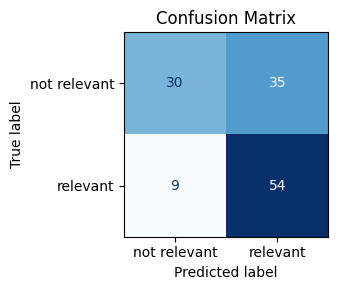

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Confusion Matrix') #put title before to avoid cropping
plt.gcf().set_size_inches(4, 3) 

# Prevent cropping
plt.tight_layout()

plt.savefig('./img/confusion_relevant_ori_trafbal_pau.png') # Save the figure before showing
plt.show()

save model

In [74]:
model_json = model.to_json()
with open("./model/relevant_arch_ori_n_trafbal.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('./model/relevant_w_ori_n_trafbal.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False)

# Get current axis and adjust figure size to fit the matrix
plt.gca().set_aspect('equal', adjustable='box')
plt.gcf().set_size_inches(cm.shape[1], cm.shape[0])  # Set figure size based on matrix dimensions

plt.title('Confusion Matrix')

# Save the figure before showing
plt.savefig('./img/confusion_relevant_ori_trafbal') #_ori_trafbal'

plt.show()


In [1]:
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))


# Get predictions for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)


NameError: name 'model' is not defined

ROC AUC: 0.500


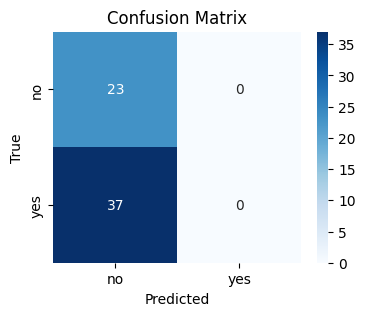

In [55]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(Y_test, y_pred)
print('ROC AUC: %.3f' % score)
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()